In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

%matplotlib inline

In [3]:
iris = load_iris()

df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df = df.drop(['sepal length (cm)' , 'sepal width (cm)'] , axis="columns")

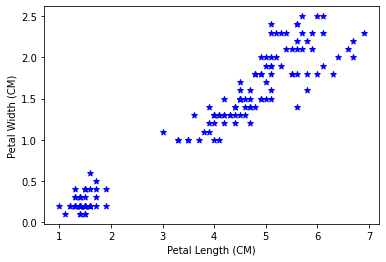

In [8]:
plt.xlabel('Petal Length (CM)')
plt.ylabel('Petal Width (CM)')
plt.scatter(df['petal length (cm)'] , df['petal width (cm)'] , color="blue" , marker='*')

In [13]:
model = KMeans(n_clusters=2)
predict = model.fit_predict(df[['petal length (cm)','petal width (cm)']])
predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
df['clusters'] = predict
df

,petal length (cm),petal width (cm),clusters
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,1
146,0.677966,0.750000,1
147,0.711864,0.791667,1
148,0.745763,0.916667,1


In [20]:
df1 = df[df.clusters == 0]
df2 = df[df.clusters == 1]

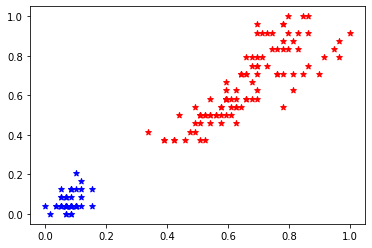

In [23]:
plt.scatter(df1['petal length (cm)'] , df1['petal width (cm)'] , color="blue" , marker='*')
plt.scatter(df2['petal length (cm)'] , df2['petal width (cm)'] , color="red" , marker='*')

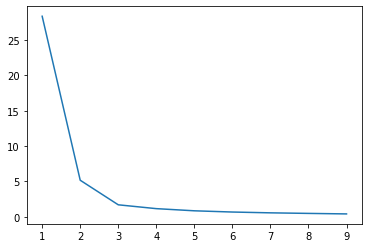

In [25]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal width (cm)','petal length (cm)']])
    sse.append(km.inertia_)
plt.plot(k_rng,sse)